# <font style = "color:purple"> Network Analytics </font> 

## <font style = "color:purple"> Degree-Centrality </font> 

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator


Bad key "text.kerning_factor" on line 4 in
E:\anacondajadid\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


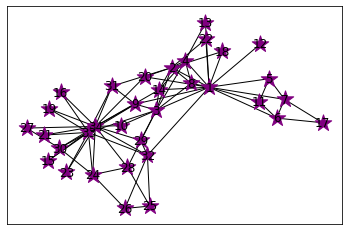

In [2]:
H = nx.karate_club_graph()
H = nx.convert_node_labels_to_integers(H , first_label=1)
nx.draw_networkx(H , node_color="purple" , node_shape="*")

In [3]:
dcent = nx.degree_centrality(H)

In [4]:
dcent[34]

0.5151515151515151

## <font style = "color:purple"> Changing undirected Graph to Directed </font> 

In [5]:
# Directed networks
G = H.to_directed(H) 
indecent = nx.in_degree_centrality(G)
indecent[34]

0.5151515151515151

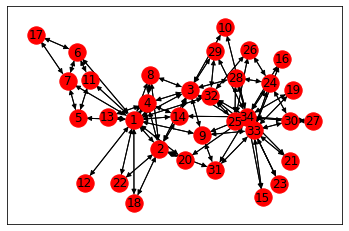

In [6]:
nx.draw_networkx(G , node_color="red" )

In [7]:
# stanford datasets https://snap.stanford.edu/data/
# https://arxiv.org/
# https://github.com/snap-stanford/graphgym

In [8]:
outdgree= nx.out_degree_centrality(G)
outdgree[34]

0.5151515151515151

## closeness centrality

In [9]:
closcen = nx.closeness_centrality(H)
closcen[32]

0.5409836065573771

In [10]:
n = sum(nx.shortest_path_length(H,32).values())
(len(G.nodes())-1) / n

0.5409836065573771

In [11]:
# Directed closness centrality
nx.closeness_centrality(G )

{1: 0.5689655172413793,
 2: 0.4852941176470588,
 3: 0.559322033898305,
 4: 0.4647887323943662,
 5: 0.3793103448275862,
 6: 0.38372093023255816,
 7: 0.38372093023255816,
 8: 0.44,
 9: 0.515625,
 10: 0.4342105263157895,
 11: 0.3793103448275862,
 12: 0.36666666666666664,
 13: 0.3707865168539326,
 14: 0.515625,
 15: 0.3707865168539326,
 16: 0.3707865168539326,
 17: 0.28448275862068967,
 18: 0.375,
 19: 0.3707865168539326,
 20: 0.5,
 21: 0.3707865168539326,
 22: 0.375,
 23: 0.3707865168539326,
 24: 0.39285714285714285,
 25: 0.375,
 26: 0.375,
 27: 0.3626373626373626,
 28: 0.4583333333333333,
 29: 0.4520547945205479,
 30: 0.38372093023255816,
 31: 0.4583333333333333,
 32: 0.5409836065573771,
 33: 0.515625,
 34: 0.55}

In [12]:
bwcent = nx.betweenness_centrality(G , normalized=True , endpoints= False)

In [13]:
sorted(bwcent.items() , key=operator.itemgetter(1) ,reverse=True)[0:5]

[(1, 0.43763528138528146),
 (34, 0.30407497594997596),
 (33, 0.145247113997114),
 (3, 0.14365680615680618),
 (32, 0.13827561327561325)]

In [14]:
bwcent_choice = nx.betweenness_centrality(G , normalized=True , endpoints= False , k=10)

In [15]:
btencent_subset = nx.betweenness_centrality_subset(G , [34,33,1,2,5,9,8,15,19],[16,27,12],normalized=True)

In [16]:
btwnedgecrnt = nx.edge_betweenness_centrality(G)

In [17]:
# Pagerank method
nx.pagerank(G , alpha=0.9)

{1: 0.09923208031303203,
 2: 0.0543403155825792,
 3: 0.05919704684187155,
 4: 0.036612460562853694,
 5: 0.02129205163493875,
 6: 0.028358863602879276,
 7: 0.028358863602879276,
 8: 0.024777139411941047,
 9: 0.030411546757834793,
 10: 0.013746095283556584,
 11: 0.02129205163493875,
 12: 0.008523220243546811,
 13: 0.014015169158033743,
 14: 0.030254309009995452,
 15: 0.013916466828162465,
 16: 0.013916466828162465,
 17: 0.015703158296594022,
 18: 0.01395744128254017,
 19: 0.013916466828162465,
 20: 0.019434610880594574,
 21: 0.013916466828162465,
 22: 0.01395744128254017,
 23: 0.013916466828162465,
 24: 0.03165330491466868,
 25: 0.02045532726885293,
 26: 0.020410702877569672,
 27: 0.014276670024478019,
 28: 0.025579985022944167,
 29: 0.01938173195115044,
 30: 0.02603805549234405,
 31: 0.024824588072166538,
 32: 0.037572665335286734,
 33: 0.07330616298815512,
 34: 0.10345460652842152}

In [18]:
# Hubs and authorities
R=nx.hits(G)

<BarContainer object of 34 artists>

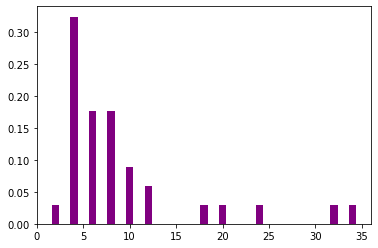

In [69]:
# Degree distributions
degrees = G.degree()
R=sorted([((degrees)[i]) for i in range(1,len(degrees)+1)])
histogram = [R.count(i)/float(nx.number_of_nodes(G)) for i in R]
plt.bar(R , histogram , color = "purple")

In [87]:
U = nx.barabasi_albert_graph(50 , 2)

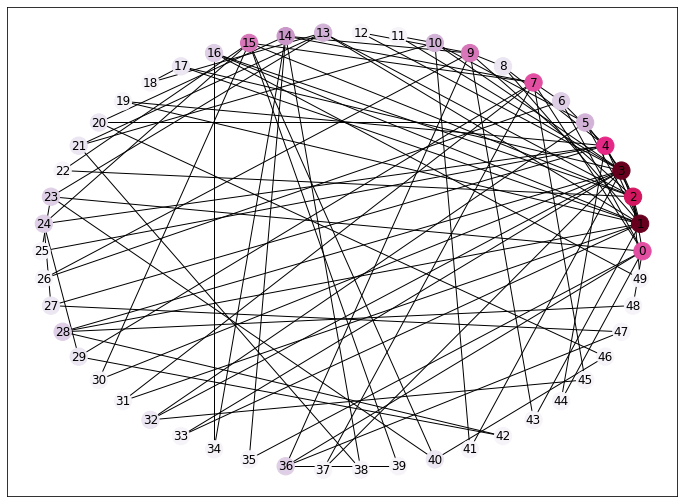

In [95]:
node_color = [U.degree(v) for v in U]
plt.figure(figsize=(12,9))
pos = nx.circular_layout(U)
nx.draw_networkx(U, pos , node_color = node_color , cmap = plt.cm.PuRd)

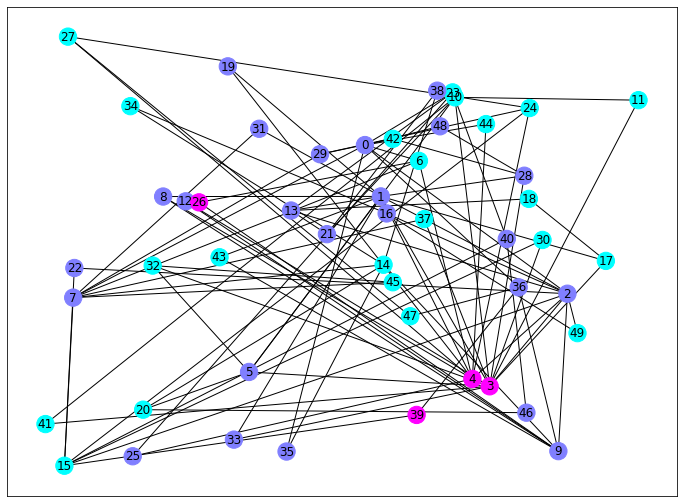

In [118]:
plt.figure(figsize=(12,9))
pos = nx.random_layout(U)
nx.draw_networkx(U, pos , node_color = node_color , cmap = plt.cm.cool)

In [108]:
p=nx.watts_strogatz_graph(50,3 ,0.4 )

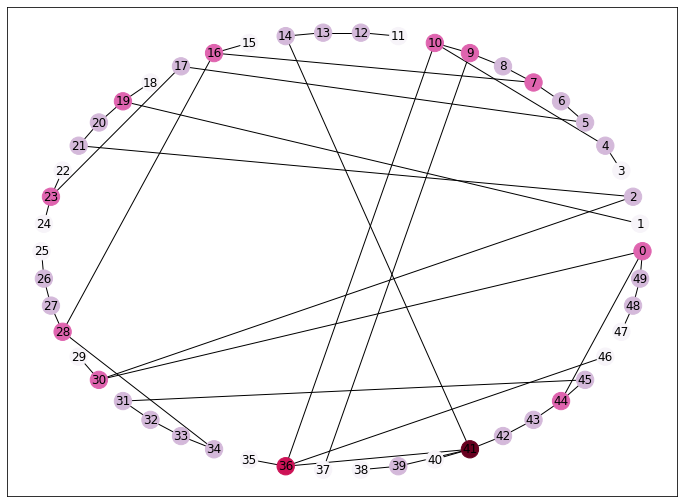

In [109]:
node_color = [p.degree(v) for v in p]
plt.figure(figsize=(12,9))
pos = nx.circular_layout(p)
nx.draw_networkx(p, pos , node_color = node_color , cmap = plt.cm.PuRd)

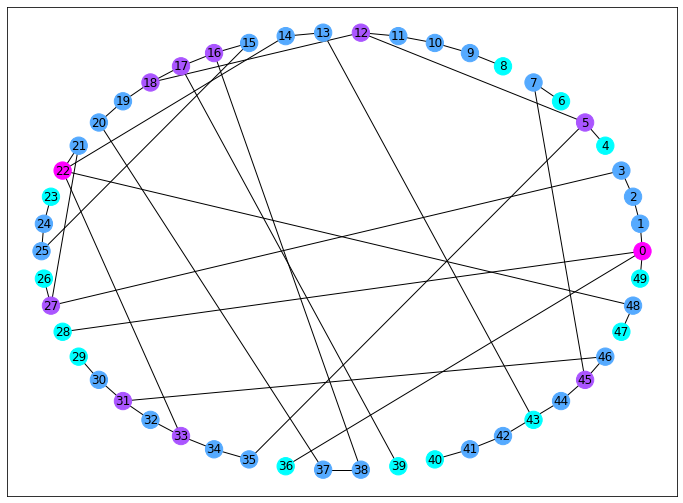

In [119]:
j=nx.connected_watts_strogatz_graph(50,3 ,0.4 ,100)
node_color = [j.degree(v) for v in j]
plt.figure(figsize=(12,9))
pos = nx.circular_layout(j)
nx.draw_networkx(j, pos , node_color = node_color , cmap = plt.cm.cool)

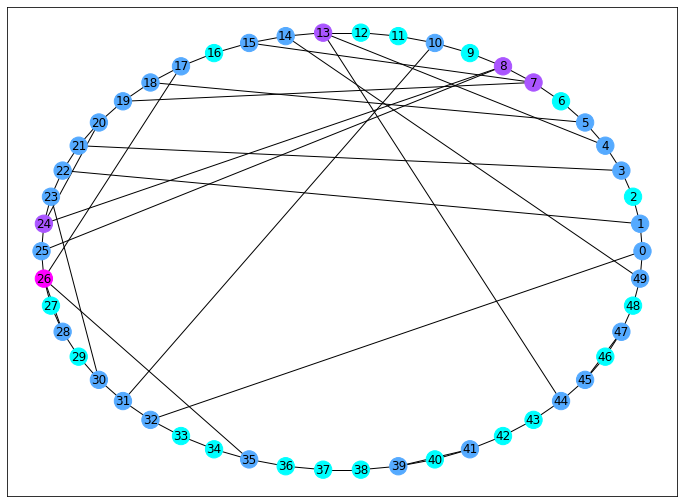

In [120]:
j=nx.newman_watts_strogatz_graph(50,3 ,0.4 )
node_color = [j.degree(v) for v in j]
plt.figure(figsize=(12,9))
pos = nx.circular_layout(j)
nx.draw_networkx(j, pos , node_color = node_color , cmap = plt.cm.cool)

In [125]:
common_neigh =[(d[0] , d[1] , len(list(nx.common_neighbors(H,d[0],d[1])))) for d in nx.non_edges(H)] 

In [128]:
#common_neigh

In [132]:
y=list(nx.jaccard_coefficient(H))
y.sort(key = operator.itemgetter(2),reverse=True)
#print(y)

In [133]:
m=list(nx.resource_allocation_index(H))